<span style="color: red; font-weight: bold; text-align: center; display: block; margin: auto; font-size: 2em;">La poule qui chante</span>


**Contexte du projet :**

L'entreprise envisage de se lancer à l'international dans le secteur de l'exportation de poulets. Dans ce contexte, une analyse approfondie des groupements de pays ciblés et une étude de marché sont nécessaires pour assurer le succès de cette expansion. L'objectif est de comprendre les opportunités et les défis liés à l'exportation de poulets dans différents pays et régions du monde.

**Objectifs de l'entreprise :**

1. **Analyse des groupements de pays :**
   L'entreprise souhaite obtenir une analyse initiale des groupements de pays qui offrent le meilleur potentiel pour l'exportation de poulets. Cette analyse permettra d'identifier les marchés prioritaires et d'orienter les efforts d'expansion internationale.

2. **Approfondissement de l'étude de marché :**
   Après avoir identifié les groupements de pays ciblés, l'entreprise souhaite approfondir l'étude de marché dans ces régions. Cela implique d'analyser les tendances du marché, la demande des consommateurs, la concurrence, ainsi que les aspects réglementaires et économiques spécifiques à chaque pays.

3. **Livraison des résultats et recommandations :**
   L'entreprise attend une livraison complète du projet, comprenant :
   - Une documentation décrivant le contexte du projet de data analyse, y compris les objectifs et les attentes.
   - Une présentation de la démarche suivie pour réaliser l'analyse, en évitant les détails mathématiques complexes et en vulgarisant les sujets abordés.
   - Les résultats de l'analyse, y compris les insights tirés des méthodes de clustering (classification ascendante hiérarchique et k-means), ainsi que les visualisations associées.
   - Des recommandations basées sur les résultats de l'analyse, afin d'orienter la stratégie d'expansion internationale de l'entreprise dans le secteur de l'exportation de poulets.

En résumé, l'entreprise cherche à exploiter les données de la FAO pour prendre des décisions éclairées concernant son expansion internationale dans le secteur de l'exportation de poulets, en s'appuyant sur une analyse approfondie des groupements de pays et du marché.


**2ème partie résumé de la demande :**


1. *Analyse des groupements de pays :*
   - Utilisation de la classification ascendante hiérarchique (CAH) et de la méthode des k-means pour regrouper les pays similaires en quantités d'exportation.
   - Analyse des centroïdes et ACP pour visualiser les résultats.

2. *Étude de marché :*
   - Approfondissement de l'analyse des groupements de pays identifiés.
   - Utilisation de données supplémentaires pour enrichir l'analyse.
   - Présentation des tendances, opportunités et défis du marché.
3.*Livraisons attendues :*
   - Notebook ou fichier R avec la préparation, le nettoyage et l'analyse exploratoire des données.
   - Notebook ou fichier R avec les clusterings et les visualisations associées.
   - Présentation récapitulant le contexte, la démarche, les résultats et les recommandations.

L'objectif est d'offrir une analyse complète et des recommandations pour orienter l'exportation de poulets vers des destinations stratégiques.

<span style="color:blue; font-weight:bold; font-size:2em;">Importations des librairies et fichiers csv</span>

In [148]:
#Importations des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as s
from scipy.stats import rankdata
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta
import random
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
import os
import dask.dataframe as dd
import dask.array as da
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#### <span style="color: #87CEEB;">a) Réduction des données</span>

In [149]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc

# Charger les donnéesv
pop_dispo_alim_raw = pd.read_csv('C:\\Users\\eteiw\\OneDrive\\Bureau\\dispo_alim_filtre.csv')

display(pop_dispo_alim_raw)

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population,id_unique
0,Brésil,9982.0,4223.0,3.0,14201.0,2017,207833823,1
1,États-Unis d'Amérique,18266.0,3692.0,123.0,21914.0,2017,325084756,2
2,Pays-Bas,372.0,1418.0,608.0,1100.0,2017,17021347,3
3,Pologne,1156.0,1025.0,55.0,2351.0,2017,37953180,4
4,Thaïlande,881.0,796.0,2.0,1676.0,2017,69209810,5
...,...,...,...,...,...,...,...,...
158,Islande,10.0,0.0,2.0,10.0,2017,334393,159
159,Iraq,566.0,0.0,470.0,96.0,2017,37552781,160
160,Indonésie,2323.0,0.0,1.0,2301.0,2017,264650963,161
161,Haïti,98.0,0.0,89.0,9.0,2017,10982366,162


In [150]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd
from sklearn.preprocessing import StandardScaler

<span style="color: orange; font-size: 18px; font-family: Verdana;">
Le StandardScaler est utilisé dans le contexte de l'analyse et de la modélisation statistique pour :</span>

- <span style="color: orange; font-size: 18px; font-family: Verdana;">Préparer les données en ajustant l'échelle des variables pour que leurs moyennes soient proches de 0 et leurs écarts-types proches de 1.</span>
- <span style="color: orange; font-size: 18px; font-family: Verdana;">Faciliter la convergence des algorithmes en standardisant les données.</span>
- <span style="color: orange; font-size: 18px; font-family: Verdana;">Permettre une meilleure comparaison des variables en alignant leurs échelles, ce qui est essentiel pour des analyses objectives et justes.</span>


<span style="color: orange; font-size: 18px; font-family: Verdana;">La Classification Ascendante Hiérarchique (CAH):</span>

- <span style="color: orange; font-size: 18px; font-family: Verdana;">Regroupement des données (Clustering) et création d'une hiérarchie entre les groupes.</span>

<span style="color: orange; font-size: 18px; font-family: Verdana;">Permet:</span>

- <span style="color: orange; font-size: 18px; font-family: Verdana;">L'exploration des données et la compréhension de leur structure et des relations dans le jeu de données.</span>
- <span style="color: orange; font-size: 18px; font-family: Verdana;">La segmentation des produits en fonction de leurs caractéristiques.</span>
- <span style="color: orange; font-size: 18px; font-family: Verdana;">L'analyse des similarités entre les objets.</span>
- <span style="color: orange; font-size: 18px; font-family: Verdana;">La répartition et la réduction de la complexité des données.</span>


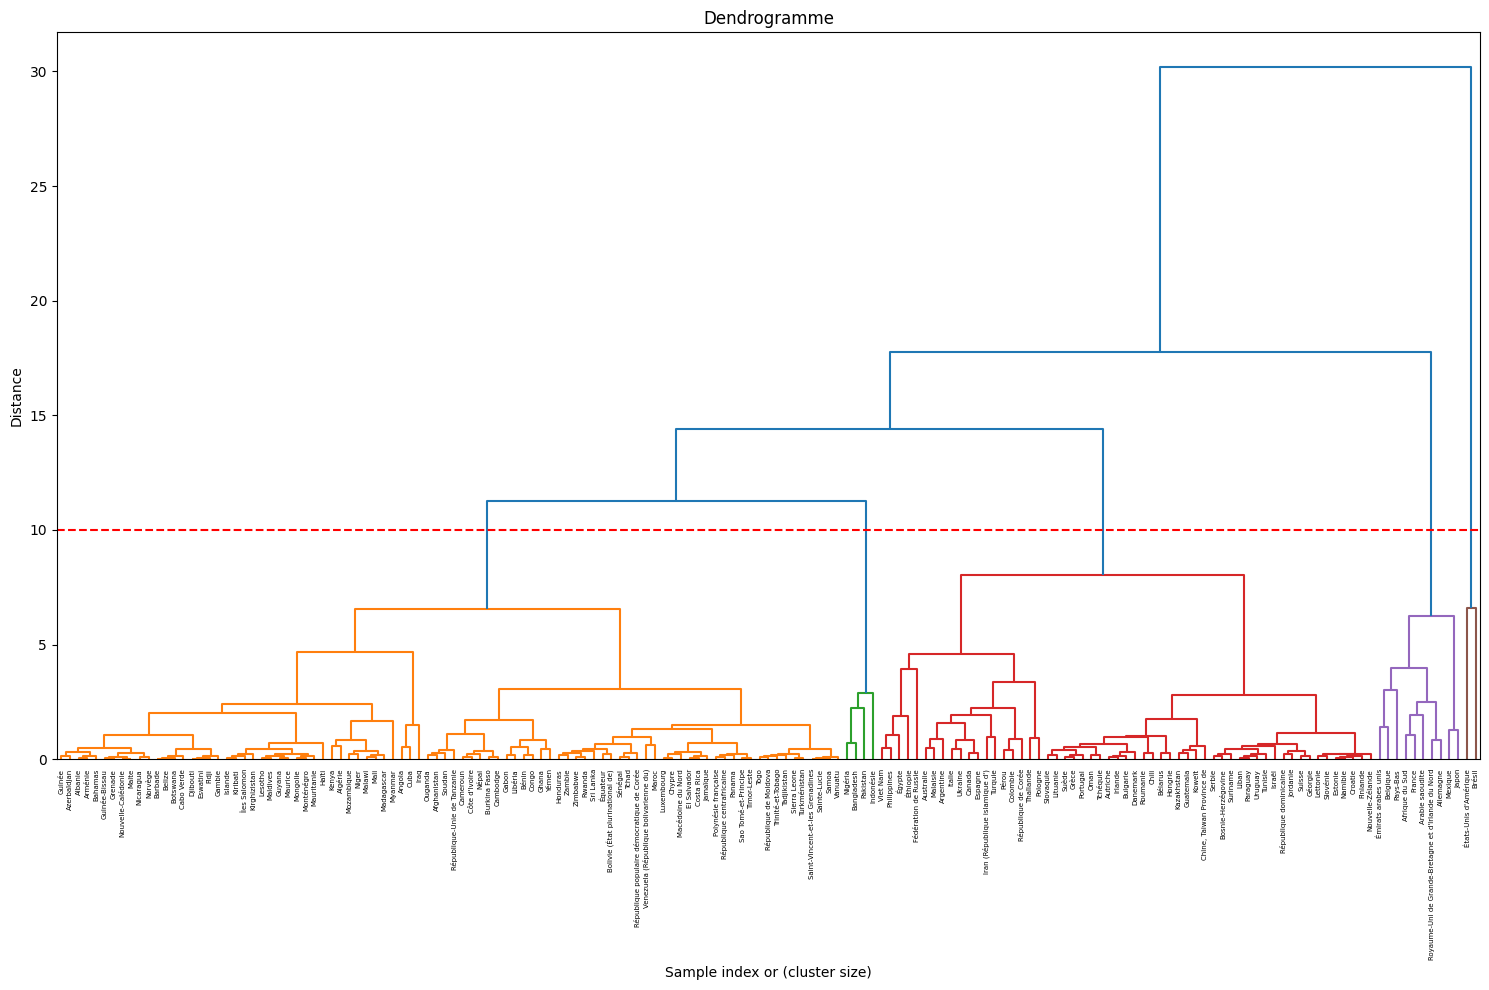

Cluster_AHC 1:
Brésil, États-Unis d'Amérique


Cluster_AHC 2:
Pays-Bas, Belgique, Allemagne, France, Royaume-Uni de Grande-Bretagne et d'Irlande du Nord, Émirats arabes unis, Afrique du Sud, Arabie saoudite, Japon, Mexique


Cluster_AHC 3:
Pologne, Thaïlande, Turquie, Ukraine, Espagne, Hongrie, Argentine, Italie, Canada, Bélarus, Danemark, Fédération de Russie, Chili, Irlande, Autriche, Roumanie, Lituanie, Bulgarie, Iran (République islamique d'), Malaisie, Portugal, Australie, Slovaquie, Grèce, Slovénie, Tchéquie, Suède, Nouvelle-Zélande, Lettonie, Croatie, Oman, Namibie, Finlande, Estonie, Jordanie, Bosnie-Herzégovine, Chine, Taiwan Province de, Serbie, Guatemala, République de Corée, République dominicaine, Kazakhstan, Géorgie, Suriname, Suisse, Koweït, Paraguay, Liban, Tunisie, Israël, Uruguay, Colombie, Philippines, Pérou, Égypte, Viet Nam, Éthiopie


Cluster_AHC 4:
Pakistan, Bangladesh, Nigéria, Indonésie


Cluster_AHC 5:
Costa Rica, El Salvador, Sri Lanka, Jamaïque, Chypre, Maro

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler


#StandardScaler
#Dendrogramme
#Clusters AHC 

pop_dispo_alim = pop_dispo_alim_raw.copy()


def plot_dendrogram_and_get_clusters(pop_dispo_alim, distance_threshold=10):
    # Standardisation des données
    scaler = StandardScaler()
    numeric_columns = pop_dispo_alim.select_dtypes(include=['float64', 'int64']).columns
    pop_dispo_alim[numeric_columns] = scaler.fit_transform(pop_dispo_alim[numeric_columns])

    # Calcul de la matrice de liaison avec la méthode de Ward
    linked = linkage(pop_dispo_alim[numeric_columns], method='ward')

    # Affichage du dendrogramme
    plt.figure(figsize=(15, 10))
    dendrogram(linked, 
               orientation='top', 
               labels=pop_dispo_alim['Zone'].values, 
               distance_sort='descending', 
               show_leaf_counts=True,
               color_threshold=distance_threshold)

    plt.title('Dendrogramme')
    plt.xlabel('Sample index or (cluster size)')
    plt.ylabel('Distance')
    plt.axhline(y=distance_threshold, color='r', linestyle='--')
    plt.tight_layout()
    plt.show()

    # Création des clusters AHC 
    clusters = fcluster(linked, t=distance_threshold, criterion='distance')
    pop_dispo_alim['Cluster_AHC'] = clusters

    # Affichage des pays dans chaque cluster
    for cluster_num in set(clusters):
        cluster_countries = pop_dispo_alim[pop_dispo_alim['Cluster_AHC'] == cluster_num]['Zone'].values
        print(f"Cluster_AHC {cluster_num}:")
        print(", ".join(cluster_countries))
        print("\n")

plot_dendrogram_and_get_clusters(pop_dispo_alim, distance_threshold=10)

 <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">Il est hypothétique que les clusters 1 et 2 seraient les meilleurs choix pour s'implanter, car les autres groupes comprennent des pays en développement.</span>

<span style="color: #FFA500;"></span>

In [152]:
pop_dispo_alim 

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population,id_unique,Cluster_AHC
0,Brésil,5.419482,8.859613,-0.464671,6.434508,0.0,3.715998,-1.721457,1
1,États-Unis d'Amérique,10.195200,7.718073,0.216967,10.087121,0.0,6.138651,-1.700205,1
2,Pays-Bas,-0.120672,2.829444,2.971922,0.230322,0.0,-0.226592,-1.678952,2
3,Pologne,0.331303,1.984575,-0.169294,0.822752,0.0,0.205904,-1.657699,3
4,Thaïlande,0.172766,1.492273,-0.470351,0.503095,0.0,0.851733,-1.636447,3
...,...,...,...,...,...,...,...,...,...
158,Islande,-0.329365,-0.218962,-0.470351,-0.285865,0.0,-0.571379,1.636447,5
159,Iraq,-0.008831,-0.218962,2.188038,-0.245139,0.0,0.197631,1.657699,5
160,Indonésie,1.004077,-0.218962,-0.476032,0.799074,0.0,4.889961,1.678952,4
161,Haïti,-0.278633,-0.218962,0.023836,-0.286339,0.0,-0.351370,1.700205,5


In [153]:
# Sélection des colonnes numériques
numeric_columns = pop_dispo_alim.select_dtypes(include=[np.number]).columns

# Affichage des statistiques après la standardisation
print("Moyenne des colonnes :")
print(pop_dispo_alim[numeric_columns].mean())
print("\nÉcart type des colonnes :")
print(pop_dispo_alim[numeric_columns].std())
print("\nValeur minimale des colonnes :")
print(pop_dispo_alim[numeric_columns].min())
print("\nValeur maximale des colonnes :")
print(pop_dispo_alim[numeric_columns].max())


Moyenne des colonnes :
Disponibilité intérieure   -2.179579e-17
Exportations - Quantité     2.179579e-17
Importations - Quantité    -4.359158e-17
Production                  2.179579e-17
Année                       0.000000e+00
population                 -1.089789e-17
id_unique                   0.000000e+00
Cluster_AHC                 4.042945e+00
dtype: float64

Écart type des colonnes :
Disponibilité intérieure    1.003082
Exportations - Quantité     1.003082
Importations - Quantité     1.003082
Production                  1.003082
Année                       0.000000
population                  1.003082
id_unique                   1.003082
Cluster_AHC                 1.124089
dtype: float64

Valeur minimale des colonnes :
Disponibilité intérieure   -0.333977
Exportations - Quantité    -0.218962
Importations - Quantité    -0.481712
Production                 -0.290601
Année                       0.000000
population                 -0.576019
id_unique                  -1.721457
Clust

<span style="color: #FFA500; font-family: Verdana; font-size: 16px;">

- Moyennes proches de zéro : données probablement normalisées.
  
- Écarts types similaires : répartition uniforme des données.
  
- Valeurs min. et max. variées : "Cluster_AHC" varie de 1 à 5, indiquant peut-être le nombre de clusters.

</span>

<span style="color: orange; font-size: 18px; font-family: Verdana;"> PCA </span>

- <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">**Réduction de la dimensionnalité :**</span>
  - <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">Le PCA transforme un grand nombre de variables en un plus petit nombre de composantes principales, qui sont des combinaisons linéaires des variables d'origine.</span>
  - <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">Les composantes principales sont choisies pour capturer la variance maximale des données et sont orthogonales entre elles, simplifiant ainsi la représentation des données tout en préservant leur structure essentielle.</span>

- <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">**Décorrélation :**</span>
  - <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">Le PCA aide à séparer les informations importantes des variations non significatives (bruit) présentes dans les données d'origine.</span>

- <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">**Prétraitement des données :**</span>
  - <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">En réduisant la dimensionnalité, le PCA rend les données plus faciles à interpréter en identifiant les variables qui contribuent le plus à la variation globale des données.</span>
  - <span style="color: #FFA500; font-family: Verdana; font-size: 16px;">Cela facilite également la visualisation des données complexes en les projetant dans des espaces à plus faible dimensionnalité (typiquement deux ou trois dimensions), ce qui aide à détecter des structures ou des groupes dans les données.</span>



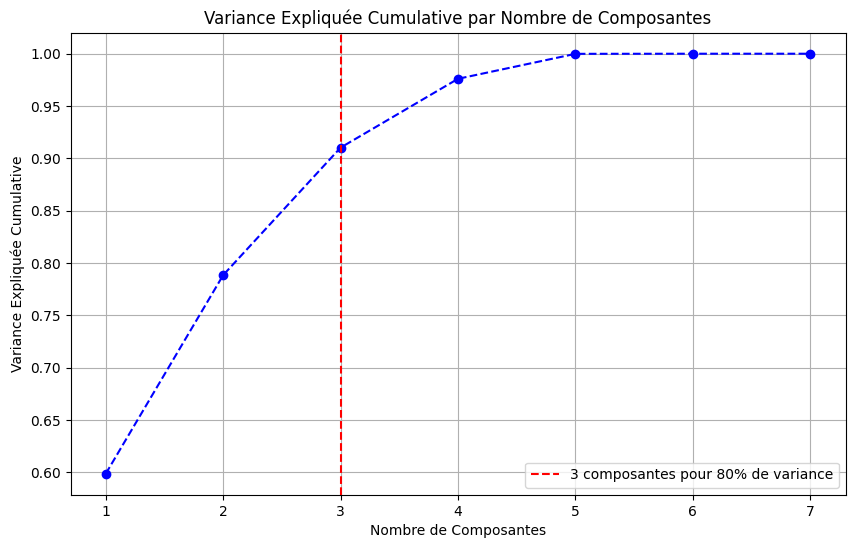

Nombre de composantes pour expliquer 80% de la variance : 3


In [154]:
#elbow


# Sélection des colonnes numériques
numeric_columns = pop_dispo_alim.select_dtypes(include=['float64', 'int64']).columns

# Création de l'objet PCA
pca = PCA(n_components=len(numeric_columns))

# Application de PCA aux données numériques seulement
pop_dispo_alim_pca = pca.fit_transform(pop_dispo_alim[numeric_columns])

# Calcul de la variance expliquée
explained_variance = pca.explained_variance_ratio_

# Calcul de la variance cumulative expliquée
cumulative_variance = np.cumsum(explained_variance)

# Recherche du nombre de composantes pour atteindre 80% de variance expliquée
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1

# Tracé du graphique de variance cumulative expliquée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Variance Expliquée Cumulative par Nombre de Composantes')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulative')
plt.axvline(n_components_80, color='r', linestyle='--', label=f'{n_components_80} composantes pour 80% de variance')

# Configuration des abscisses en pointillé
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):.0f}'))

plt.legend()
plt.grid(True)
plt.show()

print(f"Nombre de composantes pour expliquer 80% de la variance : {n_components_80}")


<span style="color: #FFA500; font-family: Verdana; font-size: 16px;">L'axe Y représente le nombre de composantes principales et l'axe y la variance. On remarque que nous avons trois composantes principales qui expliquent 80% de la variance des données. Cela suggère que ces trois composantes principales pourraient correspondre aux valeurs qui composent les trois clusters.</spam>

In [155]:
from sklearn.decomposition import PCA

# Créez un objet PCA en spécifiant le nombre de composantes souhaitées
nombre_composantes = 2
pca = PCA(n_components=nombre_composantes)


# Excluez les colonnes non numériques
numeric_columns = pop_dispo_alim.select_dtypes(include=['float64', 'int64']).columns

# Appliquez PCA aux données numériques seulement
pop_dispo_alim_pca = pca.fit_transform(pop_dispo_alim[numeric_columns])

# Créez une nouvelle DataFrame avec les composantes principales
pop_dispo_alim_pca_df = pd.DataFrame(data=pop_dispo_alim_pca, columns=[f'PC{i}' for i in range(1, nombre_composantes+1)])

# Ajoutez les colonnes non numériques (non utilisées dans PCA) à la nouvelle DataFrame
pop_dispo_alim_pca_df = pop_dispo_alim_pca_df.join(pop_dispo_alim.drop(columns=numeric_columns))

# Affichez les premières lignes de la DataFrame PCA
print("DataFrame PCA :")
print(pop_dispo_alim_pca_df.head())

print("\nShape de la DataFrame après PCA :", pop_dispo_alim_pca.shape)


DataFrame PCA :
         PC1       PC2                   Zone  Cluster_AHC
0  12.055003 -3.003575                 Brésil            1
1  16.940457 -3.848057  États-Unis d'Amérique            1
2   2.208390  2.758716               Pays-Bas            2
3   1.974782  0.327448                Pologne            3
4   1.713036  0.183360              Thaïlande            3

Shape de la DataFrame après PCA : (163, 2)


<span style="color: #FFA500; font-family: Verdana; font-size: 16px;">

- Le cluster 1 inclut des pays qui sont des acteurs importants sur le plan économique et commercial.

- Le cluster 2 comprend des pays au développement international robuste, avec une économie et un commerce bien établis.

Hypothétiquement, le cluster 1 pourrait représenter une opportunité intéressante en termes d'implantation.

</span>

<span style="color: orange; font-size: 18px; font-family: Verdana;">Réduction des dimensions à 2 composantes principales avec PCA </span>

- <span style="color: #FFA500;">Permet de représenter les données de manière plus concise, en réduisant une DataFrame initiale à un espace à deux dimensions.</span>
- <span style="color: #FFA500">Facilite la visualisation des relations entre les observations, rendant plus facile la détection de clusters ou de tendances.</span>
- <span style="color: #FFA500;">Simplifie l'analyse et l'interprétation des données en se concentrant sur les deux composantes principales qui capturent l'essentiel de la variance.</span>

<span style="color: #FFA500;">

  - Le PCA :
  
  - Pour réduire la dimensionnalité à deux composantes principales (PC1 et PC2).
  
  - Simplifie la représentation des données.
  
</span>


DataFrame PCA :
         PC1       PC2                   Zone  Cluster_AHC
0  12.055003 -3.003575                 Brésil            1
1  16.940457 -3.848057  États-Unis d'Amérique            1
2   2.208390  2.758716               Pays-Bas            2
3   1.974782  0.327448                Pologne            3
4   1.713036  0.183360              Thaïlande            3

Shape de la DataFrame après PCA : (163, 2)


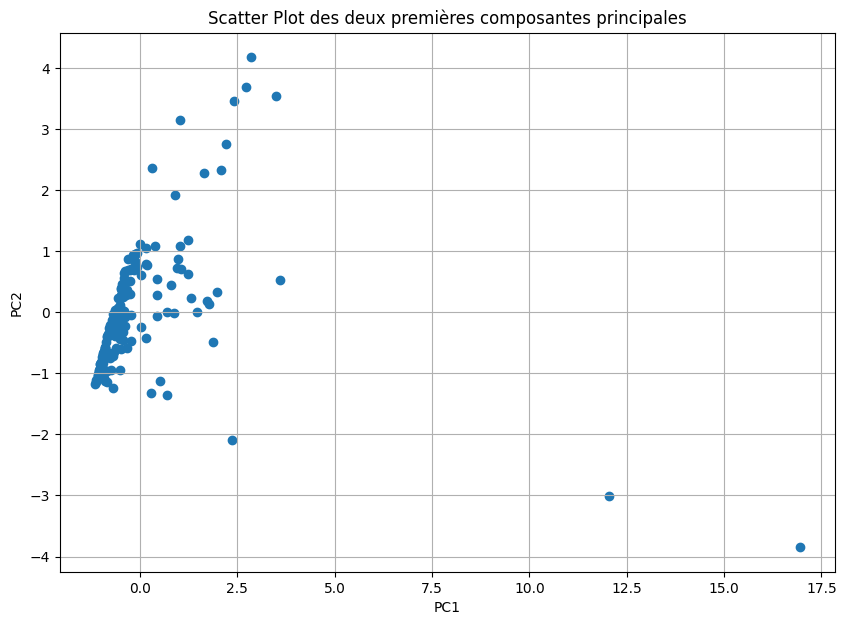

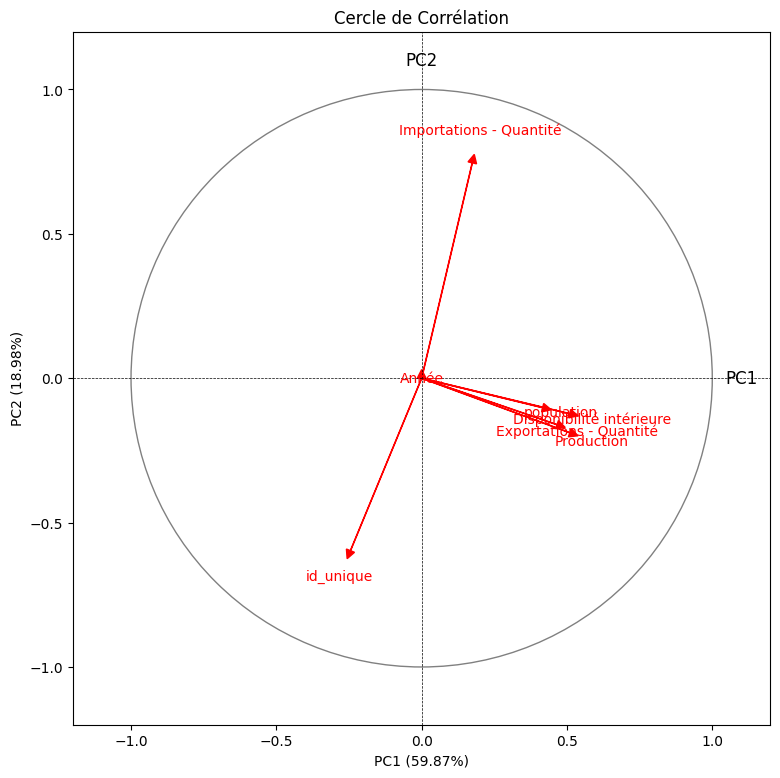

In [156]:
# Affichage des premières lignes de la DataFrame PCA
print("DataFrame PCA :")
print(pop_dispo_alim_pca_df.head())

print("\nShape de la DataFrame après PCA :", pop_dispo_alim_pca.shape)

# Scatter Plot
plt.figure(figsize=(10, 7))
plt.scatter(pop_dispo_alim_pca_df['PC1'], pop_dispo_alim_pca_df['PC2'])
plt.title('Scatter Plot des deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Cercle de corrélation
def plot_correlation_circle(pca, components, features, explained_variance):
    plt.figure(figsize=(9, 9))
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    plt.gca().add_artist(circle)
    for i, feature in enumerate(features):
        plt.arrow(0, 0, components[i, 0], components[i, 1], 
                  head_width=0.03, head_length=0.03, fc='red', ec='red')
        plt.text(components[i, 0] * 1.15, components[i, 1] * 1.15, feature, color='red', ha='center', va='center')

    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.xlabel(f'PC1 ({explained_variance[0]:.2f}%)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.2f}%)')

    # Lignes pointillées pour les axes
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)

     # Ajouter les étiquettes des axes
    plt.text(1.1, 0, 'PC1', color='black', ha='center', va='center', fontsize=12)
    plt.text(0, 1.1, 'PC2', color='black', ha='center', va='center', fontsize=12)
    

    # Grille pour une meilleure visualisation
    plt.grid(True)
    
    plt.grid()
    plt.title('Cercle de Corrélation')
    plt.show()

# Calcul des composantes pour le cercle de corrélation
components = pca.components_.T
explained_variance = pca.explained_variance_ratio_ * 100

# Plotting the correlation circle
plot_correlation_circle(pca, components, numeric_columns, explained_variance)

Pourquoi 2 composantes ? 
- Simplicité du modèle et donc plus facile à interpréter.
- Visualisation plus intuitifs.
- Variance très proches de 80%

<span style="color: #FFA500;">

**Cercle de corrélation** :

- Montre les corrélations des variables originales avec les axes obtenus par la PCA.
- Chaque vecteur (flèche) représente une variable originale dans un plan défini par deux composantes principales (PCA).
- Relation en terme de groupe de variables.

</span>

<span style="color: #FFA500;">

On remarque que PC2 explique 18.98% de la variance du jeu de données initial, tout comme PC1. Ainsi, en combinant PC1 et PC2, nous capturons 78.85% de la variance totale du jeu de données.

L'axe des abscisses représente la corrélation entre les variables initiales et le 1er composant principal.

</span>

<span style="color: #FFA500;">

Représentation des corrélations : 
- Les variables population, exportation-quantité et disponibilité intérieure sont toutes négativement corrélées, contrairement à la variable "importation-quantité", qui est positivement corrélée.

</span>


<span style="color: #FFA500;">

  - K-Means :
  
  - Aide à identifier des regroupements naturels ou des motifs dans les données qui ne sont pas facilement visibles dans l'espace de dimension plus élevée d'origine.
  
</span>

<span style="color: #FFA500;">

  En résumé, ce code combine les avantages de PCA pour la réduction de dimension et de K-Means pour le clustering, offrant ainsi une approche puissante pour l'exploration et l'analyse de données, en particulier lorsque les données sont initialement complexes et comportent plusieurs variables.

</span>

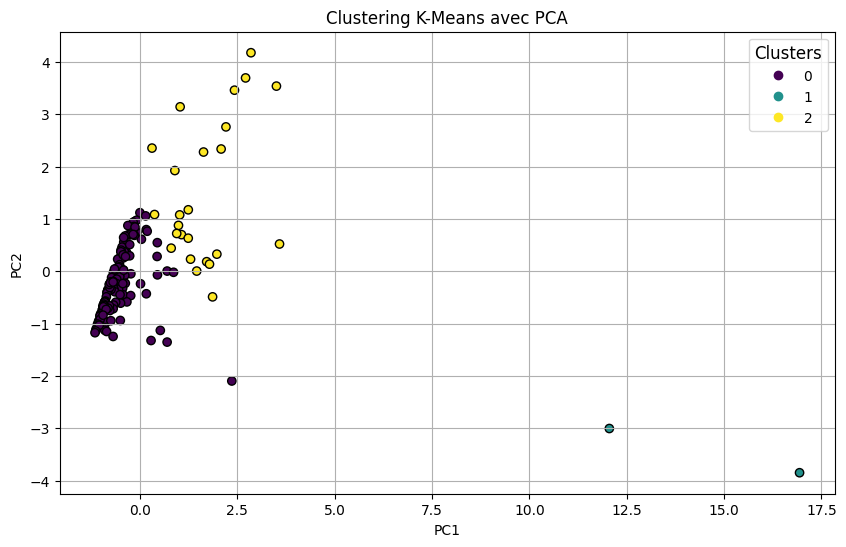

In [175]:
# Import des bibliothèques nécessaires
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialisation de K-Means
kmeans = KMeans(n_clusters=3, random_state=42)

# Extraction des composantes principales PC1 et PC2 à partir de votre DataFrame
X_pca = pop_dispo_alim_pca_df[['PC1', 'PC2']]

# Entraînement du modèle K-Means
kmeans.fit(X_pca)

# Ajout des étiquettes de cluster à votre DataFrame
pop_dispo_alim_pca_df['cluster_pca'] = kmeans.labels_

# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Scatter plot des données avec couleur selon les clusters trouvés par K-Means
scatter = plt.scatter(pop_dispo_alim_pca_df['PC1'], pop_dispo_alim_pca_df['PC2'], c=pop_dispo_alim_pca_df['cluster_pca'], cmap='viridis', edgecolor='k')
plt.title('Clustering K-Means avec PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Ajout d'une légende pour les clusters
legend = plt.legend(*scatter.legend_elements(), title='Clusters', loc='upper right')
plt.setp(legend.get_title(), fontsize='large')

plt.grid(True)
plt.show()


<span style="color: #FFA500;">On observe une répartition inégale des points, avec les échantillons répartis en 3 classes où certains points entre classes sont éloignés tandis que d'autres sont proches. </span>
<span style="color: #FFA500;"> Nous observons plusieurs groupes de clusters, principalement dans la zone du PC2, ainsi que deux points vers le PC1. Il semble que l'axe PC1 des clusters reflète l'importance et la taille des pays.</span>


In [158]:
# assume pop_dispo_alim_pca_df and pop_dispo_alim_df are your DataFrames and unique_id is the column to merge on
merged_df = pd.merge(pop_dispo_alim_pca_df, pop_dispo_alim_raw, on=['Zone'])

# display the merged DataFrame
display(merged_df.head())

,PC1,PC2,Zone,Cluster_AHC,cluster_pca,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population,id_unique
0,12.055003,-3.003575,Brésil,1,1,9982.0,4223.0,3.0,14201.0,2017,207833823,1
1,16.940457,-3.848057,États-Unis d'Amérique,1,1,18266.0,3692.0,123.0,21914.0,2017,325084756,2
2,2.208390,2.758716,Pays-Bas,2,2,372.0,1418.0,608.0,1100.0,2017,17021347,3
3,1.974782,0.327448,Pologne,3,2,1156.0,1025.0,55.0,2351.0,2017,37953180,4
4,1.713036,0.183360,Thaïlande,3,2,881.0,796.0,2.0,1676.0,2017,69209810,5


<span style="color: #FFA500;">Nous effectuons une fusion avec les PCA afin d'obtenir une meilleure lecture des résultats.</span>

In [159]:
merged_df_grouped = merged_df.groupby('cluster_pca').mean(numeric_only=True)

display(merged_df_grouped)

,PC1,PC2,Cluster_AHC,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population,id_unique
cluster_pca,,,,,,,,,,
0,-0.514756,-0.223797,4.345588,190.992647,9.610294,38.558824,169.926471,2017.0,1.713485e+07,93.816176
1,14.497730,-3.425816,1.000000,14124.000000,3957.500000,63.000000,18057.500000,2017.0,2.664593e+08,1.500000
2,1.640457,1.491522,2.640000,1621.280000,295.200000,338.120000,1631.960000,2017.0,6.795056e+07,24.160000


<span style="color: #FFA500;">

- Le PC1 met en évidence les pays où la taille de la population est significative, avec des chiffres élevés dans ces dimensions.

- Le Cluster 1 pourrait être considéré comme représentant la taille des pays les plus importants en termes de production et d'exportations.

- Le PC2 montre des indicateurs plus modestes, associés à des populations moins importantes.

</span>


In [160]:
merged_df = merged_df.sort_values(by='PC1', ascending=False)
display(merged_df)

,PC1,PC2,Zone,Cluster_AHC,cluster_pca,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population,id_unique
1,16.940457,-3.848057,États-Unis d'Amérique,1,1,18266.0,3692.0,123.0,21914.0,2017,325084756,2
0,12.055003,-3.003575,Brésil,1,1,9982.0,4223.0,3.0,14201.0,2017,207833823,1
18,3.584090,0.521391,Fédération de Russie,3,2,4556.0,115.0,226.0,4444.0,2017,145530082,19
46,3.504463,3.537738,Mexique,2,2,4219.0,9.0,972.0,3249.0,2017,124777324,47
45,2.850753,4.175547,Japon,2,2,2415.0,10.0,1069.0,2215.0,2017,127502725,46
...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1.087289,-1.037793,Lesotho,5,0,17.0,0.0,15.0,2.0,2017,2091534,155
151,-1.090314,-1.008532,Maldives,5,0,12.0,0.0,12.0,0.0,2017,496402,152
155,-1.128009,-1.104480,Kiribati,5,0,2.0,0.0,1.0,1.0,2017,114158,156
158,-1.136221,-1.140155,Islande,5,0,10.0,0.0,2.0,10.0,2017,334393,159


<span style="color: #FFA500;">Les clusters 1 et 2 montrent des similitudes dans leur capacité de production et d'exportation, mais ils présentent des différences en termes de volume d'importation et de taille de population.</span>

<span style="color: #FFA500;">Pour un marché large et diversifié :</span>
- <span style="color: #FFA500;">**Cluster 1** pour sa forte capacité d'exportation.</span>
- <span style="color: #FFA500;">**Cluster 2** pour une stabilité des approvisionnements et des prix (capacité de production).</span>

<span style="color: #FFA500;">Pour profiter d'opportunités de croissance dans un marché en développement, le choix se porterait sur le Brésil.</span>

In [161]:
merged_df = merged_df.sort_values(by='PC2', ascending=False)
display(merged_df)

,PC1,PC2,Zone,Cluster_AHC,cluster_pca,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population,id_unique
45,2.850753,4.175547,Japon,2,2,2415.0,10.0,1069.0,2215.0,2017,127502725,46
6,2.712306,3.694043,Allemagne,2,2,1739.0,646.0,842.0,1514.0,2017,82658409,7
46,3.504463,3.537738,Mexique,2,2,4219.0,9.0,972.0,3249.0,2017,124777324,47
9,2.427727,3.459963,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2,2,2234.0,359.0,779.0,1814.0,2017,66727460,10
43,1.031726,3.142223,Arabie saoudite,2,2,1435.0,10.0,722.0,616.0,2017,33101178,44
...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.284386,-1.322405,Myanmar,5,0,1666.0,0.0,3.0,1662.0,2017,53382523,144
140,0.697274,-1.352461,Nigéria,4,0,202.0,0.0,0.0,201.0,2017,190873244,141
160,2.358716,-2.095637,Indonésie,4,0,2323.0,0.0,1.0,2301.0,2017,264650963,161
0,12.055003,-3.003575,Brésil,1,1,9982.0,4223.0,3.0,14201.0,2017,207833823,1


In [162]:
merged_df['product_PC1_PC2'] = merged_df['PC1'] * merged_df['PC2']
print(merged_df[['Zone','Importations - Quantité', 'product_PC1_PC2']])



                                                  Zone  \
45                                               Japon   
6                                            Allemagne   
46                                             Mexique   
9    Royaume-Uni de Grande-Bretagne et d'Irlande du...   
43                                     Arabie saoudite   
..                                                 ...   
143                                            Myanmar   
140                                            Nigéria   
160                                          Indonésie   
0                                               Brésil   
1                                États-Unis d'Amérique   

     Importations - Quantité  product_PC1_PC2  
45                    1069.0        11.903451  
6                      842.0        10.019373  
46                     972.0        12.397873  
9                      779.0         8.399848  
43                     722.0         3.241915  
..             

In [163]:
merged_df['product_PC1_PC2'] = merged_df['PC1'] * merged_df['PC2']
print(merged_df[['Zone','Disponibilité intérieure', 'product_PC1_PC2']])

                                                  Zone  \
45                                               Japon   
6                                            Allemagne   
46                                             Mexique   
9    Royaume-Uni de Grande-Bretagne et d'Irlande du...   
43                                     Arabie saoudite   
..                                                 ...   
143                                            Myanmar   
140                                            Nigéria   
160                                          Indonésie   
0                                               Brésil   
1                                États-Unis d'Amérique   

     Disponibilité intérieure  product_PC1_PC2  
45                     2415.0        11.903451  
6                      1739.0        10.019373  
46                     4219.0        12.397873  
9                      2234.0         8.399848  
43                     1435.0         3.241915  
..       

In [164]:
merged_df['product_PC1_PC2'] = merged_df['PC1'] * merged_df['PC2']
print(merged_df[['Zone','Exportations - Quantité', 'product_PC1_PC2']])

                                                  Zone  \
45                                               Japon   
6                                            Allemagne   
46                                             Mexique   
9    Royaume-Uni de Grande-Bretagne et d'Irlande du...   
43                                     Arabie saoudite   
..                                                 ...   
143                                            Myanmar   
140                                            Nigéria   
160                                          Indonésie   
0                                               Brésil   
1                                États-Unis d'Amérique   

     Exportations - Quantité  product_PC1_PC2  
45                      10.0        11.903451  
6                      646.0        10.019373  
46                       9.0        12.397873  
9                      359.0         8.399848  
43                      10.0         3.241915  
..             

 <span style="color: #FFA500;">Le dendrogramme :</span>
  - <span style="color: #FFA500;">Permet de visualiser les regroupements hiérarchiques, offrant une perspective visuelle et informative sur la structure et l'organisation des données.</span>
  - <span style="color: #FFA500;">Facilite l'interprétation des résultats du clustering et aide à décider du nombre optimal de clusters à retenir.</span>


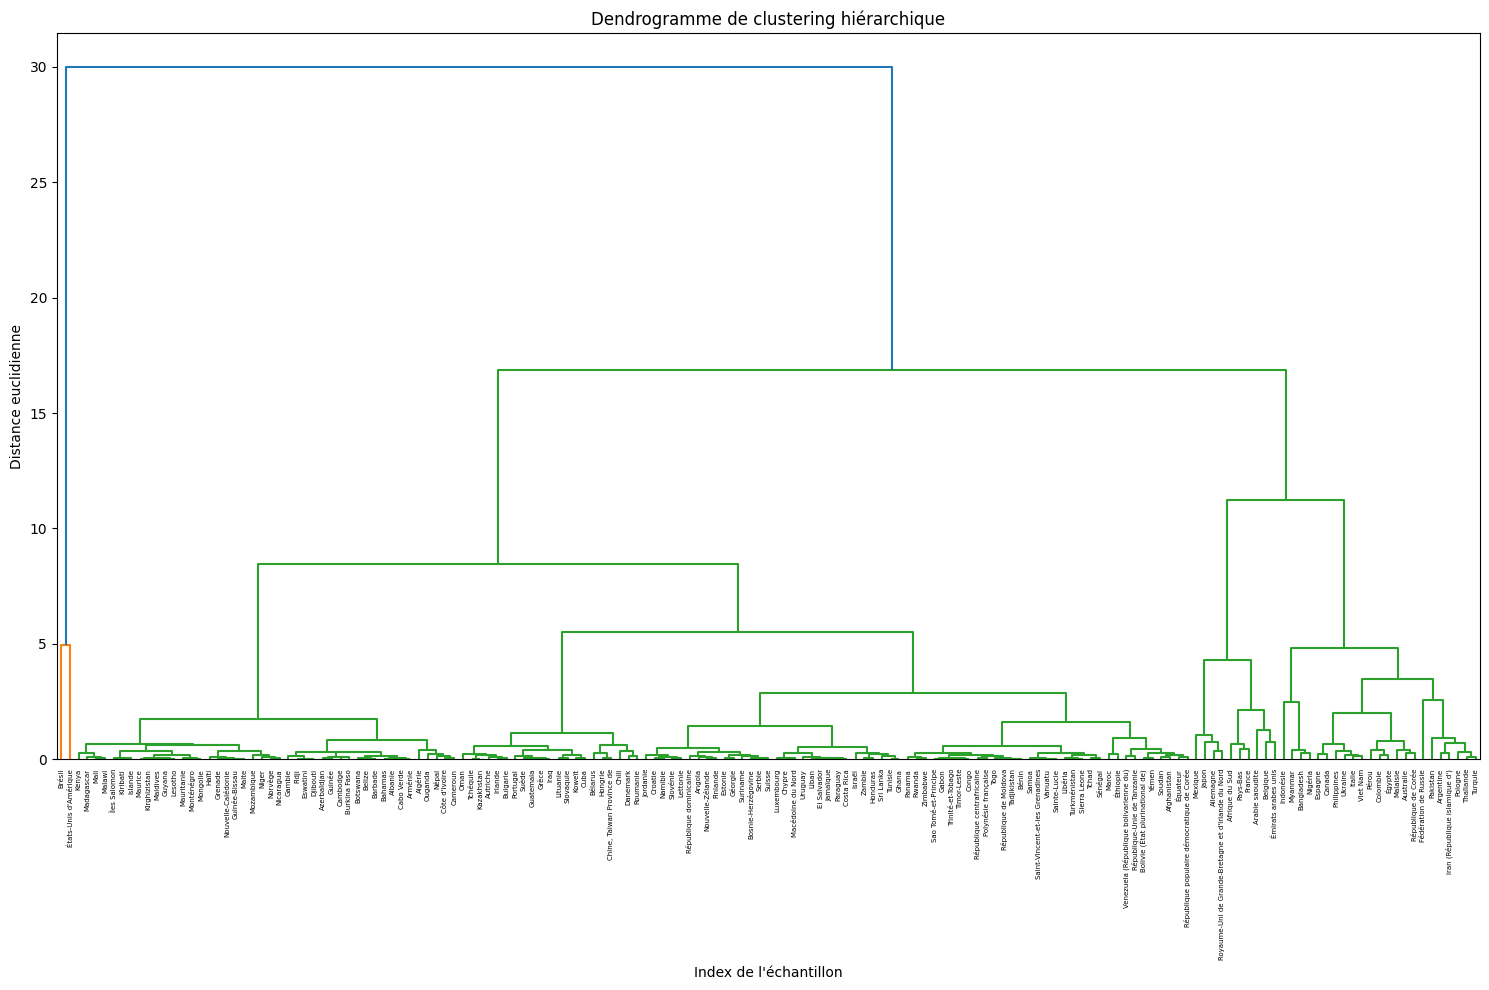

Résultats regroupés par cluster :
Cluster 1: Brésil, États-Unis d'Amérique
Cluster 2: Hongrie, Bélarus, Danemark, Chili, Irlande, Autriche, Roumanie, Lituanie, Bulgarie, Portugal, Slovaquie, Grèce, Slovénie, Tchéquie, Suède, Nouvelle-Zélande, Lettonie, Croatie, Oman, Namibie, Finlande, Estonie, Jordanie, Bosnie-Herzégovine, Chine, Taiwan Province de, Serbie, Guatemala, République dominicaine, Kazakhstan, Géorgie, Suriname, Suisse, Koweït, Paraguay, Liban, Tunisie, Israël, Uruguay, Costa Rica, El Salvador, Sri Lanka, Jamaïque, Chypre, Maroc, Luxembourg, Zambie, Honduras, Macédoine du Nord, Bolivie (État plurinational de), République centrafricaine, Rwanda, Polynésie française, Panama, Éthiopie, Zimbabwe, Équateur, Timor-Leste, Sao Tomé-et-Principe, République de Moldova, République populaire démocratique de Corée, Togo, Tchad, Trinité-et-Tobago, Tadjikistan, Sénégal, Soudan, Turkménistan, Sierra Leone, Vanuatu, Venezuela (République bolivarienne du), Samoa, Sainte-Lucie, Saint-Vincent-e

In [165]:
Z = linkage(pop_dispo_alim_pca_df[['PC1', 'PC2']], method='ward')

# Afficher le dendrogramme avec les noms des pays comme étiquettes
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=pop_dispo_alim_pca_df['Zone'].values, orientation='top')

# Ajouter des titres et des labels aux axes
plt.title('Dendrogramme de clustering hiérarchique')
plt.xlabel('Index de l\'échantillon')
plt.ylabel('Distance euclidienne')

# Ajustement de l'espacement entre les éléments du graphique
plt.tight_layout()

# Afficher le dendrogramme
plt.show()

# nombre de clusters en coupant le dendrogramme
max_d = 10  # distance
clusters = fcluster(Z, max_d, criterion='distance')

# Ajout des affectations des clusters à votre DataFrame
pop_dispo_alim_pca_df['Cluster'] = clusters

# Regrouper par cluster et afficher les zones dans chaque cluster
grouped = pop_dispo_alim_pca_df.groupby('Cluster')['Zone'].apply(list).reset_index()

# Afficher les résultats regroupés par cluster
print("Résultats regroupés par cluster :")
for index, row in grouped.iterrows():
    print(f"Cluster {row['Cluster']}: {', '.join(row['Zone'])}")

<span style="color: #FFA500;">Réduction du nombre de clusters à 4 dans la répartition des groupes..</span>

In [166]:
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd


# Calcul du dendrogramme avec la méthode de Ward
Z = linkage(pop_dispo_alim_pca_df[['PC1', 'PC2']], method='ward')

# Détermination automatique du nombre de clusters en coupant le dendrogramme
max_d = 10  # Définition du seuil de distance
clusters = fcluster(Z, max_d, criterion='distance')

# Ajout des affectations des clusters à votre DataFrame
pop_dispo_alim_pca_df['Cluster'] = clusters

# Regroupement des zones par cluster
grouped = pop_dispo_alim_pca_df.groupby('Cluster')['Zone'].apply(list).reset_index()

# Calcul des statistiques pour chaque cluster
cluster_stats = pop_dispo_alim_pca_df.groupby('Cluster')[['PC1', 'PC2']].agg(['mean', 'std', 'max'])

# Affichage des statistiques
print("Statistiques des clusters :")
for cluster in cluster_stats.index:
    print(f"Cluster {cluster}:")
    print(f"  Moyenne (mean) PC1: {cluster_stats.loc[cluster, ('PC1', 'mean')]:.2f}")
    print(f"  Écart type (std) PC1 : {cluster_stats.loc[cluster, ('PC1', 'std')]:.2f}")
    print(f"  Maximum (max) PC1 : {cluster_stats.loc[cluster, ('PC1', 'max')]:.2f}")
    print(f"  Moyenne (mean) PC2 : {cluster_stats.loc[cluster, ('PC2', 'mean')]:.2f}")
    print(f"  Écart type (std) PC2 : {cluster_stats.loc[cluster, ('PC2', 'std')]:.2f}")
    print(f"  Maximum (max) PC2 : {cluster_stats.loc[cluster, ('PC2', 'max')]:.2f}")
    print()

# Affichage des résultats regroupés par cluster
print("Résultats regroupés par cluster :")
for index, row in grouped.iterrows():
    print(f"Cluster {row['Cluster']}: {', '.join(row['Zone'])}")


Statistiques des clusters :
Cluster 1:
  Moyenne (mean) PC1: 14.50
  Écart type (std) PC1 : 3.45
  Maximum (max) PC1 : 16.94
  Moyenne (mean) PC2 : -3.43
  Écart type (std) PC2 : 0.60
  Maximum (max) PC2 : -3.00

Cluster 2:
  Moyenne (mean) PC1: -0.60
  Écart type (std) PC1 : 0.33
  Maximum (max) PC1 : 0.37
  Moyenne (mean) PC2 : -0.19
  Écart type (std) PC2 : 0.62
  Maximum (max) PC2 : 1.12

Cluster 3:
  Moyenne (mean) PC1: 1.97
  Écart type (std) PC1 : 0.99
  Maximum (max) PC1 : 3.50
  Moyenne (mean) PC2 : 2.97
  Écart type (std) PC2 : 0.74
  Maximum (max) PC2 : 4.18

Cluster 4:
  Moyenne (mean) PC1: 1.21
  Écart type (std) PC1 : 0.76
  Maximum (max) PC1 : 3.58
  Moyenne (mean) PC2 : 0.06
  Écart type (std) PC2 : 0.83
  Maximum (max) PC2 : 1.17

Résultats regroupés par cluster :
Cluster 1: Brésil, États-Unis d'Amérique
Cluster 2: Hongrie, Bélarus, Danemark, Chili, Irlande, Autriche, Roumanie, Lituanie, Bulgarie, Portugal, Slovaquie, Grèce, Slovénie, Tchéquie, Suède, Nouvelle-Zélande,

<span style="color: #FFA500;">On remarque une répartition similaire en clustering k-means avec PCA, c'est-à-dire des répartitions inégales dans la représentation de nos clusters. Dans notre structure hiérarchique, on observe différentes classes, incluant 4 clusters, qui nous renseignent sur les distances relatives. Nous constatons que certains échantillons de ces classes sont rapprochés tandis que les classes elles-mêmes sont éloignées les unes des autres. Par exemple, le cluster vert fait partie du même groupe, mais la distance entre le premier et le troisième point est significative. De même, nous observons que ce groupe est subdivisé en deux clusters distincts.</span>


In [167]:
scaler = StandardScaler()

# Copiez le DataFrame original
pop_dispo_alim = pop_dispo_alim_raw.copy()

# Sélectionnez uniquement les colonnes numériques à utiliser pour le clustering
numeric_columns = pop_dispo_alim.select_dtypes(include=['float64', 'int64']).columns

# Standardisez les données en utilisant le scaler
pop_dispo_alim[numeric_columns] = scaler.fit_transform(pop_dispo_alim[numeric_columns])

# Initialisation et ajustement du modèle k-means
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(pop_dispo_alim[numeric_columns])

# Ajout des étiquettes de clusters à la dataframe originale
pop_dispo_alim['cluster'] = kmeans.labels_

# Affichage des centroids dans l'espace des données standardisées
centroids = kmeans.cluster_centers_
print("Centroids des clusters (données standardisées) :")
print(centroids)

# Transformez les centroids dans l'espace original des données (avant standardisation)
centroids_original = scaler.inverse_transform(centroids)
print('\nCentroids des clusters (données originales) :')
print(centroids_original)

# Affichage des premières lignes de la dataframe avec les étiquettes de clusters
print("\nDataFrame avec les étiquettes de clusters :")
print(pop_dispo_alim.head())

Centroids des clusters (données standardisées) :
[[-0.16124709 -0.14038175 -0.20296525 -0.1487181   0.         -0.12835292
   0.0963356 ]
 [ 2.22814165  1.93982054  2.80461072  2.05501373  0.          1.77360398
  -1.33118289]]

Centroids des clusters (données originales) :
[[3.01618421e+02 3.65526316e+01 4.90723684e+01 2.99605263e+02
  2.01700000e+03 2.17758763e+07 8.65328947e+01]
 [4.44627273e+03 1.00418182e+03 5.78545455e+02 4.95309091e+03
  2.01700000e+03 1.13826306e+08 1.93636364e+01]]

DataFrame avec les étiquettes de clusters :
                    Zone  Disponibilité intérieure  Exportations - Quantité  \
0                 Brésil                  5.419482                 8.859613   
1  États-Unis d'Amérique                 10.195200                 7.718073   
2               Pays-Bas                 -0.120672                 2.829444   
3                Pologne                  0.331303                 1.984575   
4              Thaïlande                  0.172766              

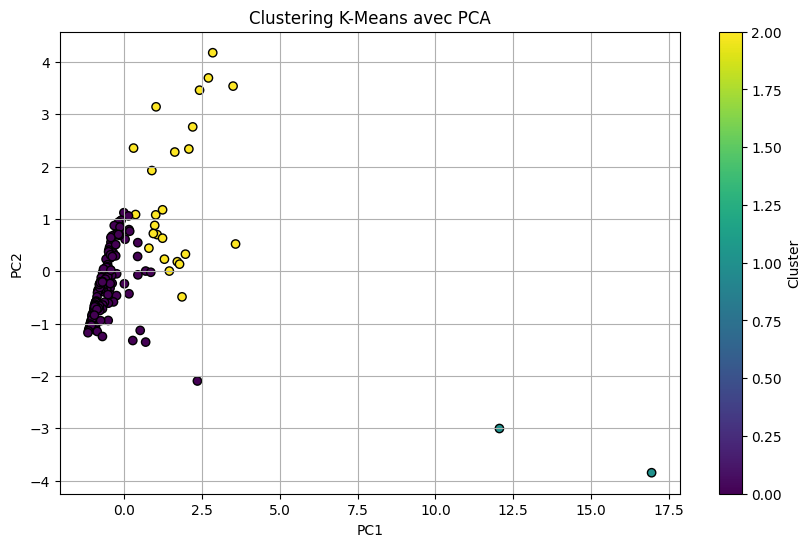

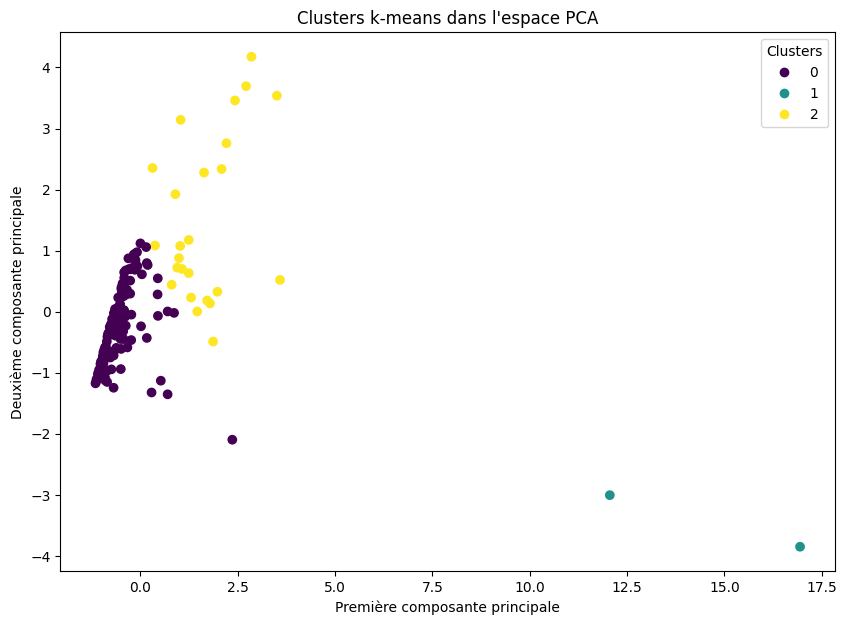

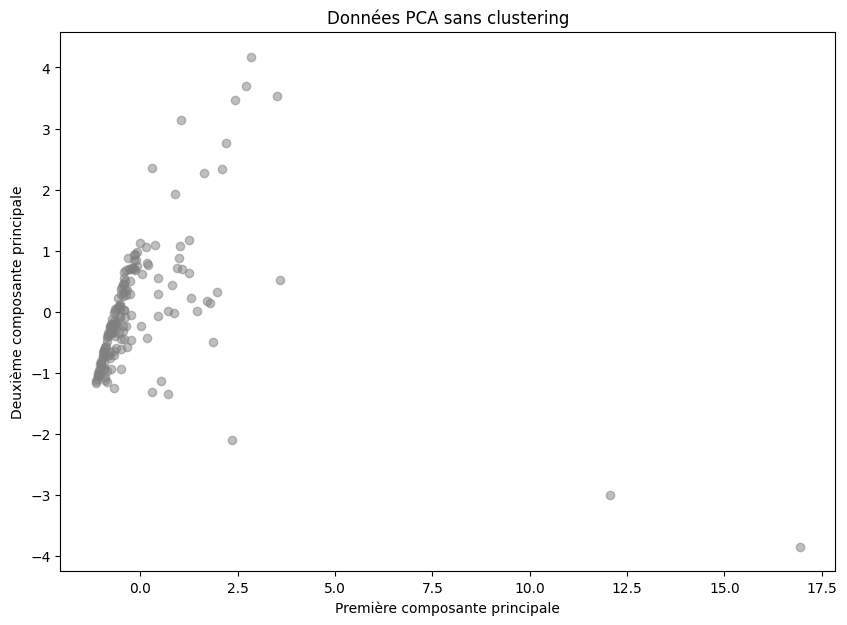

In [177]:
import matplotlib.pyplot as plt
# Initialisation de K-Means
kmeans = KMeans(n_clusters=3, random_state=42)

# Extraction des composantes principales PC1 et PC2 à partir de votre DataFrame
X_pca = pop_dispo_alim_pca_df[['PC1', 'PC2']]

#  modèle K-Means
kmeans.fit(X_pca)

# Ajout des étiquettes de cluster à votre DataFrame
pop_dispo_alim_pca_df['cluster_pca'] = kmeans.labels_

# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Scatter plot des données avec couleur selon les clusters trouvés par K-Means
plt.scatter(pop_dispo_alim_pca_df['PC1'], pop_dispo_alim_pca_df['PC2'], c=pop_dispo_alim_pca_df['cluster_pca'], cmap='viridis', edgecolor='k')
plt.title('Clustering K-Means avec PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# Ajout des étiquettes de clusters à la DataFrame PCA
pop_dispo_alim_pca_df['cluster'] = kmeans.labels_

# Visualisation des clusters k-means dans l'espace des composantes principales (PCA)
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pop_dispo_alim_pca_df['PC1'], pop_dispo_alim_pca_df['PC2'], c=pop_dispo_alim_pca_df['cluster'], cmap='viridis')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Clusters k-means dans l\'espace PCA')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

# Visualisation des données PCA seules pour comparaison
plt.figure(figsize=(10, 7))
plt.scatter(pop_dispo_alim_pca_df['PC1'], pop_dispo_alim_pca_df['PC2'], c='gray', alpha=0.5)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Données PCA sans clustering')
plt.show()


<span style="color: #FFA500;">Nous pouvons constater que l'utilisation du PCA n'a pas altéré les données et n'a entraîné aucune perte d'informations par rapport au K-means. Le PCA et le K-means présentent la même structure et les mêmes regroupements.</span>

In [169]:
display(pop_dispo_alim_pca_df)

,PC1,PC2,Zone,Cluster_AHC,cluster_pca,Cluster,cluster
0,12.055003,-3.003575,Brésil,1,1,1,1
1,16.940457,-3.848057,États-Unis d'Amérique,1,1,1,1
2,2.208390,2.758716,Pays-Bas,2,1,3,1
3,1.974782,0.327448,Pologne,3,0,4,0
4,1.713036,0.183360,Thaïlande,3,0,4,0
...,...,...,...,...,...,...,...
158,-1.136221,-1.140155,Islande,5,0,2,0
159,-0.174030,0.704410,Iraq,5,0,2,0
160,2.358716,-2.095637,Indonésie,4,0,4,0
161,-0.948531,-0.838225,Haïti,5,0,2,0


In [178]:
grouped_pca = pop_dispo_alim_pca_df.groupby('cluster_pca').count()
grouped_cluster = pop_dispo_alim_pca_df.groupby('cluster').count()

display(grouped_pca)
display(grouped_cluster)

,PC1,PC2,Zone,Cluster_AHC,Cluster,cluster
cluster_pca,,,,,,
0,136,136,136,136,136,136
1,2,2,2,2,2,2
2,25,25,25,25,25,25


,PC1,PC2,Zone,Cluster_AHC,cluster_pca,Cluster
cluster,,,,,,
0,136,136,136,136,136,136
1,2,2,2,2,2,2
2,25,25,25,25,25,25


<span style="color: #FFA500;">Nous pouvons confirmer que l'utilisation du PCA n'a eu aucun impact sur la perte de données. En revanche, le PCA permet de créer des axes pour réaliser un graphique, facilitant ainsi la lecture des résultats du K-means.</span>

                                                 Zone  product_PC1_PC2
46                                            Mexique        12.397873
45                                              Japon        11.903451
6                                           Allemagne        10.019373
9   Royaume-Uni de Grande-Bretagne et d'Irlande du...         8.399848
2                                            Pays-Bas         6.092321
7                                              France         4.869374
25                                     Afrique du Sud         3.719758
43                                    Arabie saoudite         3.241915
18                               Fédération de Russie         1.868711
5                                            Belgique         1.724533


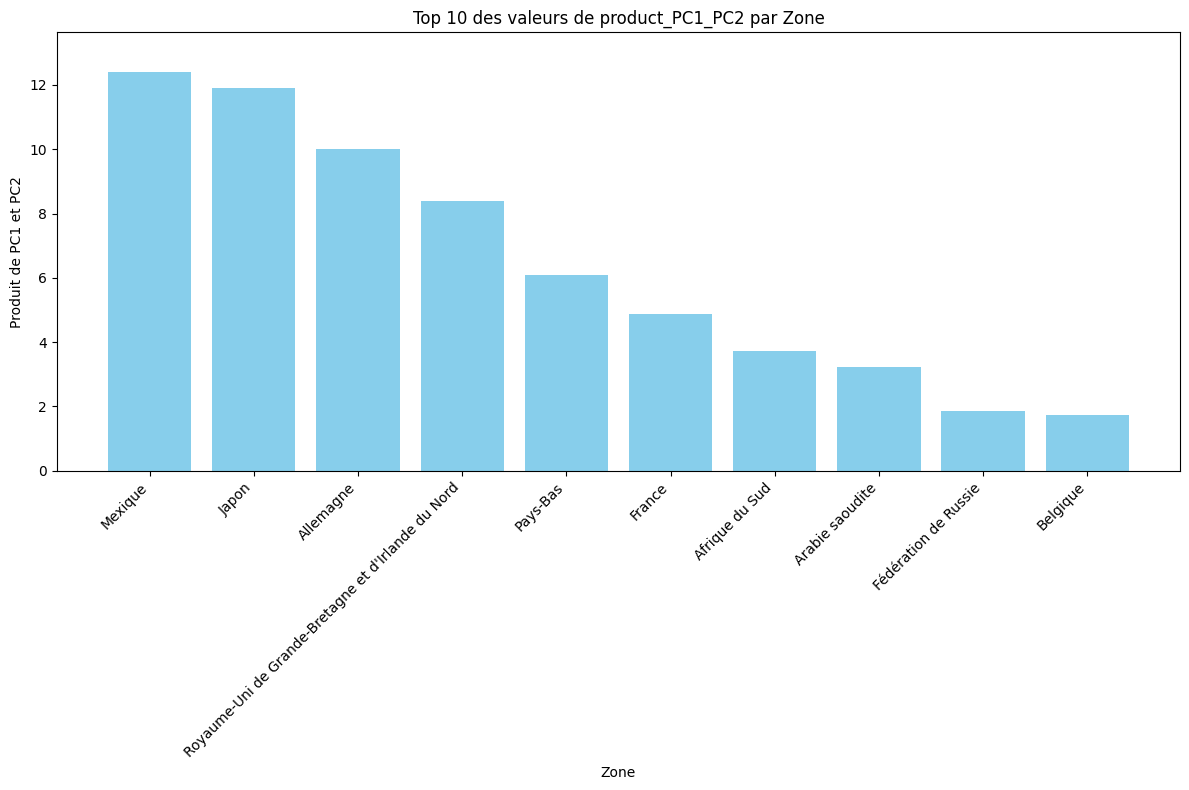

In [179]:
# Print statement (if needed)

top_10 = merged_df.nlargest(10, 'product_PC1_PC2')

print(top_10[['Zone', 'product_PC1_PC2']])

# Tri et sélection du top 10
top_10 = merged_df.nlargest(10, 'product_PC1_PC2')

# Creating the graph
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10['Zone'], top_10['product_PC1_PC2'], color='skyblue')

plt.xlabel('Zone')
plt.ylabel('Produit de PC1 et PC2')
plt.title('Top 10 des valeurs de product_PC1_PC2 par Zone')

# Ajustement des limites de l'axe y si nécessaire
plt.ylim(0, max(top_10['product_PC1_PC2']) * 1.1)  

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Affichage du graphique
plt.show()



<span style="color: #FFA500;">- Pour une position solide en Europe : L'Allemagne, la France ou les Pays-Bas pourraient être des choix pertinents en raison de leur importance économique et de leur représentation sur les composantes principales.</span>

<span style="color: #FFA500;">- Pour une forte représentation et variabilité : le Mexique ou le Japon, car ils ont les valeurs les plus élevées sur PC1_PC2. Cela indique qu'ils sont plus extrêmes ou plus distincts dans les variables mesurées par rapport aux autres pays.</span>



                                                 Zone       PC2
46                                            Mexique  3.537738
45                                              Japon  4.175547
6                                           Allemagne  3.694043
9   Royaume-Uni de Grande-Bretagne et d'Irlande du...  3.459963
2                                            Pays-Bas  2.758716
7                                              France  2.336145
25                                     Afrique du Sud  2.278345
43                                    Arabie saoudite  3.142223
18                               Fédération de Russie  0.521391
5                                            Belgique  1.924544


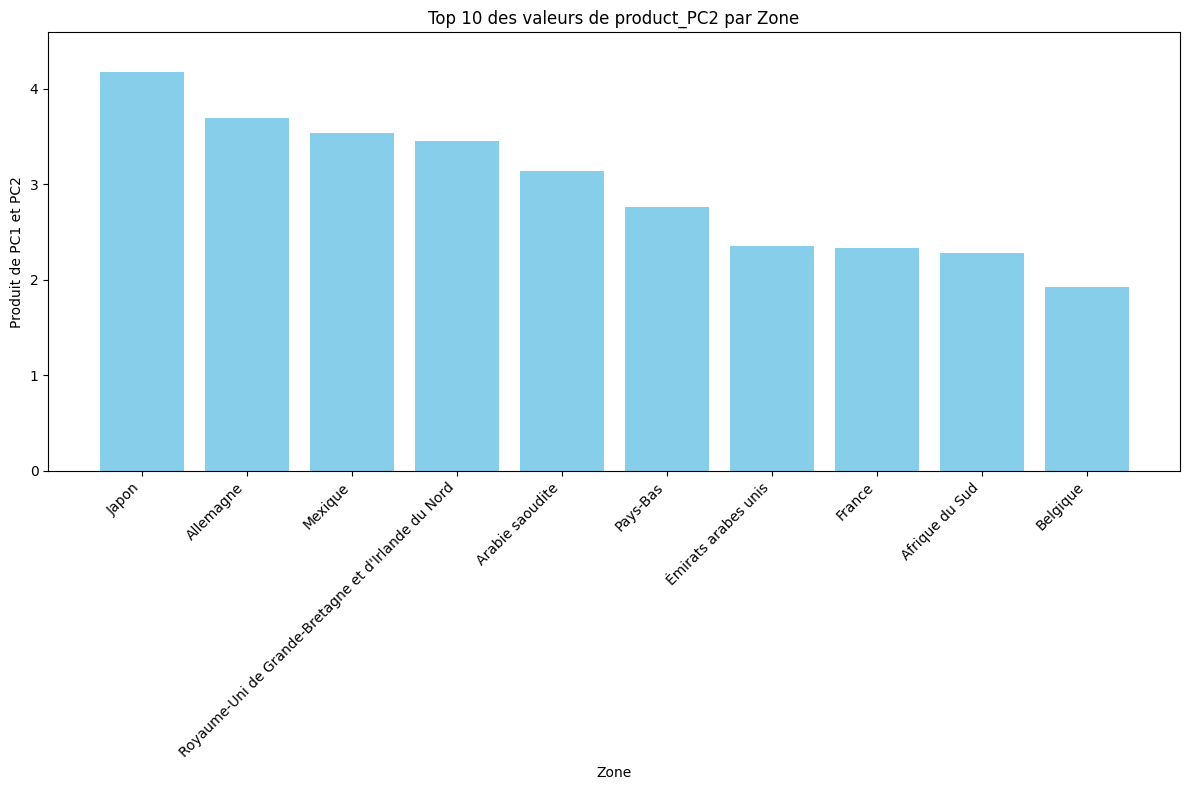

In [180]:
# Print statement (if needed)
print(top_10[['Zone', 'PC2']])

# Tri et sélection du top 10
top_10 = merged_df.nlargest(10, 'PC2')

# Creating the graph
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10['Zone'], top_10['PC2'], color='skyblue')

plt.xlabel('Zone')
plt.ylabel('Produit de PC1 et PC2')
plt.title('Top 10 des valeurs de product_PC2 par Zone')

# Ajustement l'axe y 
plt.ylim(0, max(top_10['PC2']) * 1.1)  

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Affichage du graphique
plt.show()

<span style="color: #FFA500;">- Les pays comme le Japon, le Mexique, l'Allemagne et le Royaume-Uni se distinguent avec des valeurs élevées sur PC2, ce qui pourrait indiquer une spécialisation ou une performance supérieure dans les variables.</span>

                                                 Zone       PC1
45                                              Japon  2.850753
6                                           Allemagne  2.712306
46                                            Mexique  3.504463
9   Royaume-Uni de Grande-Bretagne et d'Irlande du...  2.427727
43                                    Arabie saoudite  1.031726
2                                            Pays-Bas  2.208390
20                                Émirats arabes unis  0.308861
7                                              France  2.084363
25                                     Afrique du Sud  1.632658
5                                            Belgique  0.896074


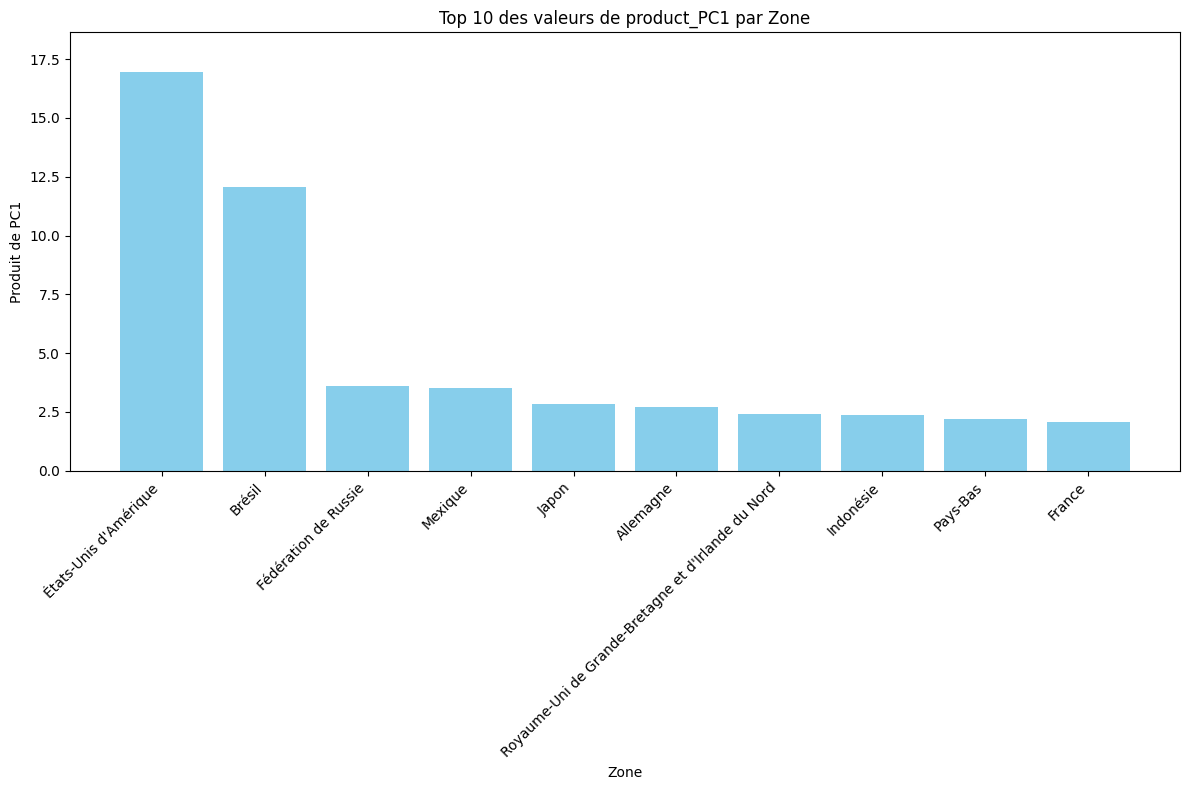

In [173]:
# Print statement (if needed)
print(top_10[['Zone', 'PC1']])

# Tri et sélection du top 10
top_10 = merged_df.nlargest(10, 'PC1')

# Creating the graph
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10['Zone'], top_10['PC1'], color='skyblue')

plt.xlabel('Zone')
plt.ylabel('Produit de PC1')
plt.title('Top 10 des valeurs de product_PC1 par Zone')

# Ajustement des limites de l'axe y si nécessaire
plt.ylim(0, max(top_10['PC1']) * 1.1)  # Ajustez selon les besoins pour assurer que les barres atteignent le sommet

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Affichage du graphique
plt.show()


<span style="color: #FFA500;">Ces pays, parmi d'autres comme le Royaume-Uni, l'Arabie saoudite, et les Pays-Bas, se distinguent par leurs valeurs sur PC1, suggérant des opportunités potentielles pour des stratégies d'exportation.</span>


### Analyse Générale

- <span style="color: #FFA500;">**Clusters basés sur le PCA** :</span>
  - <span style="color: #FFA500;"> Les valeurs de PC1_PC2 montrent clairement comment les pays sont positionnés dans l'espace des composants principaux, reflétant leur profil en termes d'exportations et d'autres variables analysées par le PCA.
Les groupes distincts formés par les pays avec des valeurs très différentes pour PC1_PC2 indiquent des caractéristiques distinctes dans leurs stratégies d'exportation et autres aspects économiques.</span>

- <span style="color: #FFA500;">**Impact sur les Exportations** :</span>
  - <span style="color: #FFA500;">Les pays avec des exportations importantes, comme les États-Unis et le Brésil, se distinguent par des valeurs très négatives sur PC1_PC2, soulignant leur rôle dominant dans le commerce mondial.
Les pays avec des exportations plus modérées montrent une diversité plus large dans leurs valeurs de PC1_PC2, révélant une dépendance à des facteurs variés dans l'espace des composants principaux.</span>


### Avantage

- <span style="color: #FFA500;">PC1 : décisions basées sur les pays qui dominent clairement dans les exportations massives</span>
- <span style="color: #FFA500;">PC2 :  obtenir une vue plus équilibrée et à explorer les dynamiques subtiles parmi les pays avec des profils économiques variés.</span>



### Conclusion

<span style="color: #FFA500;">Les résultats du PCA permettent de distinguer les pays non seulement par la quantité d'exportations, mais aussi par d'autres aspects intégrés dans les composants principaux. Les États-Unis et le Brésil se démarquent par leurs exportations massives, illustrant leur influence significative dans l'économie mondiale. En revanche, des pays comme l'Allemagne et le Japon montrent une robustesse économique malgré des volumes d'exportations moins élevés, soulignant leur capacité à maintenir une position forte grâce à d'autres aspects économiques et industriels.

<span style="color: #FFA500;">L'importance du PCA pour comprendre les dynamiques économiques entre les pays et leurs performances en termes d'exportation, offrant ainsi une perspective enrichie pour la prise de décisions stratégiques dans le commerce internatinale.</span>
